In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [4]:
# Loading the dataset
df = pd.read_csv("../archive/Position_Salaries.csv")

In [5]:
# Understanding the datastypes
df.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [6]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [7]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [8]:
df.round(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [9]:
# Making the Xs and y variables
y = df['Salary']

Xs = df.drop(['Salary', 'Position'], axis=1)

### Model

In [10]:
# Fitting the SVRegression model to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(Xs,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

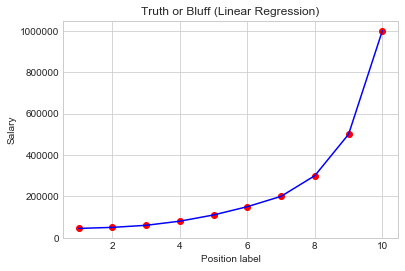

In [11]:
# Visualizing the results
plt.scatter(Xs, y, c='red')
plt.plot(Xs, regressor.predict(Xs), c='blue')
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel('Position label')
plt.ylabel('Salary')
plt.show()

In [12]:
print("The predicted result with a level of 6.5 is ${0}".format(regressor.predict(6.5)[0]))

# However, this model is not accurate as this should be split, and not be continous

The predicted result with a level of 6.5 is $150000.0


In [13]:
temp_x = df.loc[:, "Level"].values.reshape(-1,1)


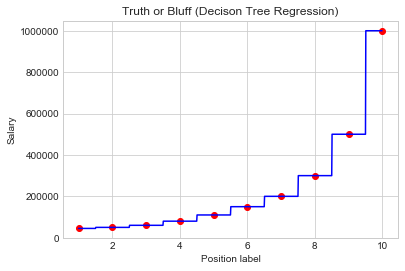

In [14]:
X_grid = np.arange(min(temp_x), max(temp_x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(Xs, y, c='red')
plt.plot(X_grid, regressor.predict(X_grid), c='blue')
plt.title("Truth or Bluff (Decison Tree Regression)")
plt.xlabel('Position label')
plt.ylabel('Salary')
plt.show()